In [14]:
import pandas as pd

df = pd.read_csv(r"C:\Users\kylew\OneDrive - Babson College\Desktop\homes.csv")

print(df.head())

print(df.info())

print(df.describe())

   Sell   "List"   "Living"   "Rooms"   "Beds"   "Baths"   "Age"   "Acres"  \
0   142      160         28        10        5         3      60      0.28   
1   175      180         18         8        4         1      12      0.43   
2   129      132         13         6        3         1      41      0.33   
3   138      140         17         7        3         1      22      0.46   
4   232      240         25         8        4         3       5      2.05   

    "Taxes"  
0      3167  
1      4033  
2      1471  
3      3204  
4      3613  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sell       50 non-null     int64  
 1    "List"    50 non-null     int64  
 2    "Living"  50 non-null     int64  
 3    "Rooms"   50 non-null     int64  
 4    "Beds"    50 non-null     int64  
 5    "Baths"   50 non-null     int64  
 6    "Age"     50 non-nu

The dataset has 8 different variables for the homes included with the prices being in thousands of dollars and living being square feet in hundreds. The average selling price of a house is 170,000. The houses range in size from 1,000 square feet to 6,400 square feet. Number of bedrooms is between 3 and 6. Number of bathrooms is between 1 and 4. The youngest house is only 2 years old with the oldest being 202 years old. The average house is about 1 acre. Property taxes have a wide range, from 1,579 to 12,192. This dataset has a wide range and variety of house with different characteristics. 

In [16]:
print(df.isnull().sum())

Sell         0
 "List"      0
 "Living"    0
 "Rooms"     0
 "Beds"      0
 "Baths"     0
 "Age"       0
 "Acres"     0
 "Taxes"     0
dtype: int64


First EDA I wanted to do was just to check the dataset for any missing values in the different variables. Missing variables can cause issues when doing any other data analysis and could skew the data.

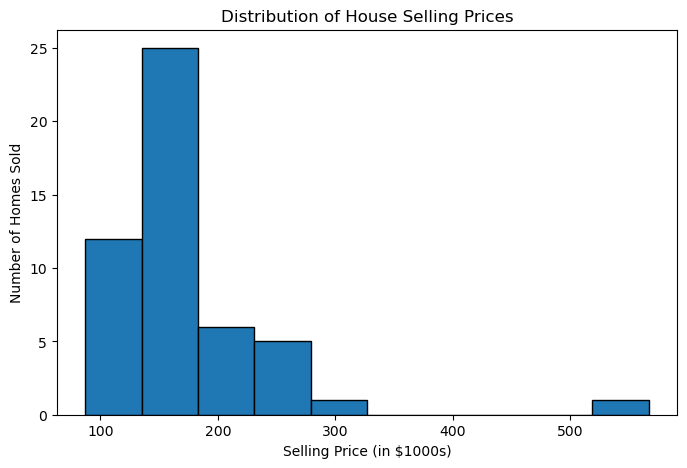

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["Sell"], bins=10, edgecolor='black')
plt.xlabel("Selling Price (in $1000s)")
plt.ylabel("Number of Homes Sold")
plt.title("Distribution of House Selling Prices")
plt.show()

The next EDA I wanted to do was look at a distribution of the house selling prices. I wanted to do this to check for any outliers in the dataset and to see the if it was skewed at all. From the histogram we can see that the data is right skewed with most of the homes being sold between 100k-200k. The outliers of the homes are 300k and past 500k could also skew the average selling price. 

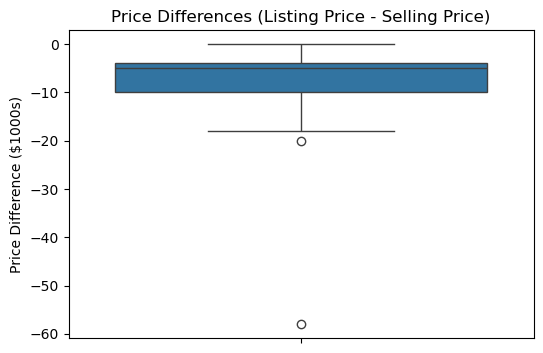

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

df["price_diff"] = df["Sell"] - df[' "List"'] 

plt.figure(figsize=(6, 4))
sns.boxplot(y=df["price_diff"])
plt.ylabel("Price Difference ($1000s)")
plt.title("Price Differences (Listing Price - Selling Price)")
plt.show()

The  EDA I wanted to do was make a box plot to look at the difference between the home's listing price and the home's actual selling price. I wanted to do this to see the range for how much less the houses sold for compared to what they are listed for. Box plot also lets us see any outliers, allowing further investigation. Looking at the box plot output, I can see that most homes sell between 5-10k below the listing price with a couple outliers way below the listing price.

Intercept: 16.87
Coefficient: 0.04


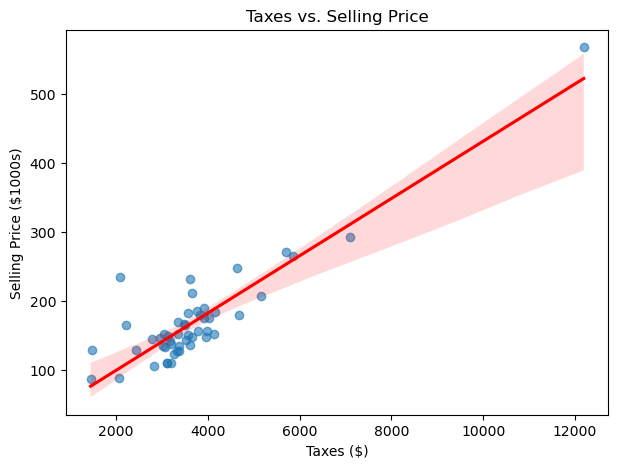

Model R² Score: 0.81


In [52]:
from sklearn.linear_model import LinearRegression

X = df[[' "Taxes"']]
y = df["Sell"]

model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.regplot(x=df[' "Taxes"'], y=df["Sell"], scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.xlabel("Taxes ($)")
plt.ylabel("Selling Price ($1000s)")
plt.title("Taxes vs. Selling Price")
plt.show()

r_squared = model.score(X, y)
print(f"Model R² Score: {r_squared:.2f}")

The intercept means that when taxes are $0, which is hypothetical, the selling price is $16,870. The coefficient of 0.04 means that for every $1 increase in taxes, the selling price of the house increases by $40. Taxes are a good predictor for selling price because the linear regression model supports that, and the R squared of 0.81 tells us that 81% of the variation in selling price can be explained by the property taxes. 

Intercept: 8.55
Coefficient: 7.66


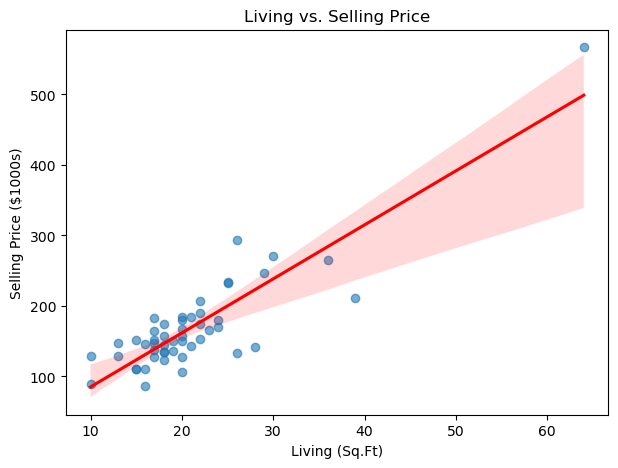

Model R² Score: 0.77


In [54]:
from sklearn.linear_model import LinearRegression

X = df[[' "Living"']]
y = df["Sell"]

model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.regplot(x=df[' "Living"'], y=df["Sell"], scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.xlabel("Living (Sq.Ft)")
plt.ylabel("Selling Price ($1000s)")
plt.title("Living vs. Selling Price")
plt.show()

r_squared = model.score(X, y)
print(f"Model R² Score: {r_squared:.2f}")

For the second model, I decided to use the living variables, which is just the square feet of the house. This model was still pretty good with an r squared of 0.77, but it is not as good as the model using property taxes as the predictor. Some limitations of the model are that it is very simple, with it only using one predictor. Adding in multiple variables would make it a better model for predicting selling price. We have also seen there are outliers within the data set, which would skew the model. 